In [24]:
import matplotlib.pyplot as plt
import mpld3
import numpy as np
from tabulate import tabulate

# change these imports???
from svgpathtools import *
from svg_extract_data import *

#%matplotlib notebook
#%matplotlib inline
mpld3.enable_notebook()

In [10]:
# svg2paths does not apply relevant transformation to paths!
#paths, attributes = svg2paths('edelweiss_ER_band_GGA3.svg')

# Document does apply relevant transformations, it's what you need
"""
doc = Document('edelweiss_ER_band_GGA3.svg')
doc = doc.flatten_all_paths()
print (doc[0].path[0].start.real)
print(len(doc[0].path))
print (doc[0].path[0].length())
"""

"\ndoc = Document('edelweiss_ER_band_GGA3.svg')\ndoc = doc.flatten_all_paths()\nprint (doc[0].path[0].start.real)\nprint(len(doc[0].path))\nprint (doc[0].path[0].length())"

In [20]:
mpld3.enable_notebook()
# in ER
# paths with 4 lines are error bars, bounding box
# paths with 10 are the bins, huh
# paths with 13 are the resolution curves
# path with 12 is the top/right axis with ticks
# paths wth 5 is left axis with ticks
# paths with 6 is bottom axis with ticks

# in NR
# paths with 4 lines are maybe some of the data points?
# path with 5 lines is axis box with bottom tick marks
# two paths with 6 lines: (1) bin marks and (2) left y-axis with tick marks
# paths with 7 lines are maybe more data points?
# paths with 8 lines are resolution curve (0 index) and data points
# paths with 8, 13 are the resolution curves
# path with 12 is the top/right axis with ticks
def get_paths(doc, path_len):
    #import matplotlib.pyplot as plt
    #import numpy as np
    path_arr = []
    
    for result in doc:
        path = result.path

        if len(path) == path_len: # maybe these are error bars?
            path_arr.append(path)
            #print (path)
            #for line in path:
                # if the line is NOT a Bezier curve
                #if not hasattr(line, 'control1'):
                    #print ("plotting, ", len(path))

    return path_arr

def plot_paths(paths):
    for path in paths:
        for line in path:
            #print(path)
            plt.plot([line.start.real,line.end.real],[line.start.imag,line.end.imag],'ro-',label='python')
            
    plt.ylim(0,200)
    plt.xlim(0,200)


Path(Line(start=(50.67500000000001+2.576909999999998j), end=(51.63375000000001+11.279409999999999j)),
     Line(start=(51.63375000000001+11.279409999999999j), end=(52.59125000000001+18.54441j)),
     CubicBezier(start=(52.59125000000001+18.54441j), control1=(59.01125000000001+58.34941j), control2=(65.13625000000002+76.52316j), end=(107.59000000000002+80.56691000000001j)),
     Line(start=(107.59000000000002+80.56691000000001j), end=(108.55000000000001+80.72566j)),
     Line(start=(108.55000000000001+80.72566j), end=(109.58500000000002+80.80566j)),
     CubicBezier(start=(109.58500000000002+80.80566j), control1=(132.22125000000003+82.95191000000001j), control2=(155.35250000000002+83.10441000000002j), end=(178.07375000000002+83.35941j)),
     Line(start=(178.07375000000002+83.35941j), end=(179.03125000000003+83.44066000000001j)),
     Line(start=(179.03125000000003+83.44066000000001j), end=(183.86500000000004+83.46190999999999j)))


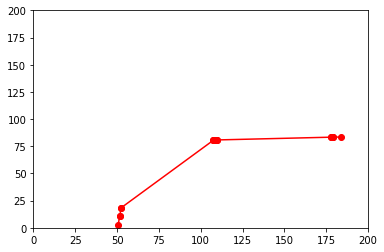

In [39]:
doc = Document('edelweiss_NR_band_GGA3.svg')
doc = doc.flatten_all_paths()

#print(len(paths)) #2 paths with 13 lines in edelweiss_ER_band_GGA3.svg
#paths_ER = get_paths(doc, 13)
#plot_paths(paths_ER)

paths_NR = get_paths(doc, 8)
plot_paths((paths_NR[0],))
print(paths_NR[0])

plt.show()

In [13]:
doc_ER = Document('edelweiss_ER_band_GGA3.svg')
doc_ER = doc_ER.flatten_all_paths()

# these are the points for the ER graph
graph_points_ER = np.array([(0,0), (50,0), (100,0), (150,0), (200,0), (0,0.05), (0,0.1), (0,0.15)])

# get_calib_fn (doc, graph_points):
xcalib_fn_ER, ycalib_fn_ER = get_calib_fn(doc_ER, graph_points_ER)
    
print(xcalib_fn_ER(54.4), ycalib_fn_ER(64.4))
print(xcalib_fn_ER(68.8), ycalib_fn_ER(86))
# these are the points for the NR graph
#graph_points = np.array([(0,0), (50,0), (100,0), (150,0), (200,0), (0,0.025), (0,0.05), (0,0.075), (0, 0.1)])

34.73079000000004 175.06081 1.6618999999999744 147.37939999999998
svg calibration points:
[[ 34.7308  147.3794 ]
 [104.89579   2.5769 ]
 [175.06079   2.5769 ]
 [ 34.7308   50.8719 ]
 [139.93829   2.5769 ]
 [ 69.85455 147.3794 ]
 [104.8958  147.3794 ]
 [ 34.7308    2.5769 ]
 [ 34.7308   99.0844 ]
 [ 34.73079   2.5769 ]
 [175.0608  147.3794 ]
 [ 69.85454   2.5769 ]
 [139.9383  147.3794 ]]
28.015767694788522 0.08595908661429012
48.54357026934723 0.06358123501749227


In [14]:
doc_NR = Document('edelweiss_NR_band_GGA3.svg')
doc_NR = doc_NR.flatten_all_paths()

# these are the points for the NR graph
graph_points_NR = np.array([(0,0), (50,0), (100,0), (150,0), (200,0), (0,0.025), (0,0.05), (0,0.075), (0, 0.1)])

# get_calib_fn (doc, graph_points):
xcalib_fn_NR, ycalib_fn_NR = get_calib_fn(doc_NR, graph_points_NR)

39.09999999999991 183.90000000000003 2.4593999999999028 147.37940000000003
svg calibration points:
[[183.9     147.3794 ]
 [ 87.31375 147.3794 ]
 [183.9     147.3794 ]
 [ 39.1       2.5769 ]
 [ 39.1     111.21815]
 [183.9      74.97815]
 [ 39.1       2.5769 ]
 [ 39.1      38.73815]
 [183.9       2.5769 ]
 [ 39.1     147.3794 ]
 [135.6075  147.3794 ]
 [183.9     111.21815]
 [ 39.1      74.97815]
 [183.9      38.73815]
 [ 39.1       2.57691]]


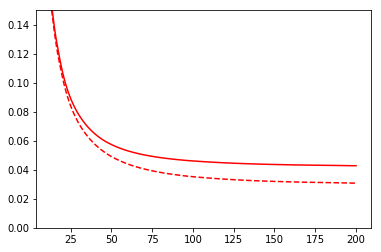

[[1.36688437e+01 1.50149705e-01 1.32999848e+01 1.50175585e-01]
 [1.38758030e+01 1.48031685e-01 1.35434297e+01 1.47970075e-01]
 [1.41016248e+01 1.45914723e-01 1.37868747e+01 1.45764565e-01]
 [1.43443298e+01 1.43798708e-01 1.40303197e+01 1.43559055e-01]
 [1.45870348e+01 1.41682694e-01 1.42737646e+01 1.41353545e-01]
 [1.48297398e+01 1.39566679e-01 1.45172096e+01 1.39148035e-01]
 [1.50823888e+01 1.37451307e-01 1.47606546e+01 1.36942526e-01]
 [1.53575838e+01 1.35337393e-01 1.50050128e+01 1.34737073e-01]
 [1.56327788e+01 1.33223479e-01 1.52858997e+01 1.32533915e-01]
 [1.59079737e+01 1.31109565e-01 1.55667867e+01 1.30330757e-01]
 [1.62030004e+01 1.29183236e-01 1.58476736e+01 1.28127599e-01]
 [1.65109913e+01 1.27341742e-01 1.61438369e+01 1.25925544e-01]
 [1.68203615e+01 1.25446071e-01 1.64646124e+01 1.23725264e-01]
 [1.71339559e+01 1.23500345e-01 1.67853879e+01 1.21524985e-01]
 [1.74546197e+01 1.21508689e-01 1.71100500e+01 1.19385892e-01]
 [1.77851976e+01 1.19475224e-01 1.74522592e+01 1.174748

In [69]:
#paths[0].point(1)
# choose paths from ER with 13 lines (those are the curves)
paths_ER = get_paths(doc_ER, 13)

x_arr = np.linspace(0,1,100)
path0_arr = np.array([(paths_ER[0].point(x).real, paths_ER[0].point(x).imag) for x in x_arr])
path1_arr = np.array([(paths_ER[1].point(x).real, paths_ER[1].point(x).imag) for x in x_arr])
#print(path0_arr[1:5,:])
plt.plot(xcalib_fn_ER(path0_arr[:,0]), ycalib_fn_ER(path0_arr[:,1]),'r')
plt.plot(xcalib_fn_ER(path1_arr[:,0]), ycalib_fn_ER(path1_arr[:,1]),'r--')
plt.ylim(0,0.15)
plt.show()

table = np.column_stack([xcalib_fn_ER(path0_arr[:,0]), ycalib_fn_ER(path0_arr[:,1]), xcalib_fn_ER(path1_arr[:,0]), ycalib_fn_ER(path1_arr[:,1])])
print(table)
headers=["'Erecoil (keV) for aH=0.035'", "'ER yield width for aH=0.035'", "'Erecoil (keV) for aH=0.02'", "'ER yield width for aH=0.02'"]
#print (tabulate(table, headers=headers, tablefmt="plain", numalign="left"))

#with open("edelweiss_ER_band_GGA3_curveData.txt", "w") as text_file:
#    print(tabulate(table, headers=headers, tablefmt="plain", numalign="left"), file=text_file)

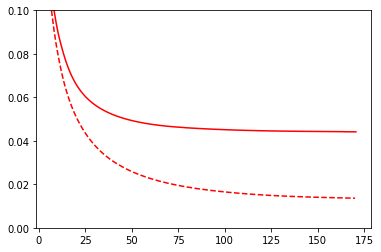

'Erecoil (keV) for C=0.04'    'ER yield width for C=0.04'    'Erecoil (keV) for C=0'    'ER yield width for C=0'
8.25174                       0.0999891                      6.89757                    0.0998812
8.50172                       0.0987035                      7.10798                    0.0983667
8.7517                        0.0974179                      7.33468                    0.096853
9.00169                       0.0961322                      7.56137                    0.0953393
9.25167                       0.0948466                      7.78807                    0.0938256
9.51741                       0.0935621                      8.01476                    0.0923118
9.8157                        0.0922798                      8.24146                    0.0907981
10.114                        0.0909975                      8.50666                    0.0892864
10.4123                       0.0897151                      8.7737                     0.0877748
10.782

In [67]:
import itertools
# choose paths from NR with 13, 8 lines (those are the curves)
# this itertools thing is needed because get_paths returns an array of paths
#print(get_paths(doc_NR,8)[0])
paths_NR = list(itertools.chain(*(get_paths(doc_NR, 13), [get_paths(doc_NR,8)[0]])))
#print(paths_NR)
#print("end paths_NR")

x_arr = np.linspace(0,1,100)
path0_arr = get_points_from_path(paths_NR[0], x_arr, xcalib_fn_NR, ycalib_fn_NR)
path1_arr = get_points_from_path(paths_NR[1], x_arr, xcalib_fn_NR, ycalib_fn_NR)
#print(path0_arr[1:5,:])
plt.plot(path0_arr[:,0], path0_arr[:,1],'r--')
plt.plot(path1_arr[:,0], path1_arr[:,1],'r')
plt.ylim(0,0.1)
plt.show()

table = np.column_stack([path1_arr[:,0], path1_arr[:,1], path0_arr[:,0], path0_arr[:,1]])
#print(table)
headers=["'Erecoil (keV) for C=0.04'", "'ER yield width for C=0.04'", "'Erecoil (keV) for C=0'", "'ER yield width for C=0'"]
print (tabulate(table, headers=headers, tablefmt="plain", numalign="left"))

#with open("edelweiss_NR_band_GGA3_curveData.txt", "w") as text_file:
#    print(tabulate(table, headers=headers, tablefmt="plain", numalign="left"), file=text_file)

In [ ]:
idx = 5
print(paths[idx], attributes[idx])

print("path is continuous? ", paths[idx].iscontinuous())
print("path is closed? ", paths[idx].isclosed())

In [ ]:
#paths[idx].isclosed()
